In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 數據集 (波士頓房價)

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 波士頓房價影響因素
* CRIM 犯罪率
* ZN 住宅用地所佔比例
* INDUS 非商業用地所佔比率
* CHAS 查爾斯河的虛擬變量
* NOX 一氧化碳濃度
* RM 平均房間數
* AGE 1940年以前建的房子之自住比例
* DIS 就業中心之加權距離
* RAD 高速公路的可到達指數
* TAX 不動產稅率
* PTRATIO 學生和教師的比例
* B 城鎮的黑人比例
* LSTAT 低等階層比例

In [5]:
boston = pd.DataFrame(boston_dataset.data,
                     columns = boston_dataset.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 篩選關聯性較高的feature
分析「各個房價影響因素」和「房價」的線性關係

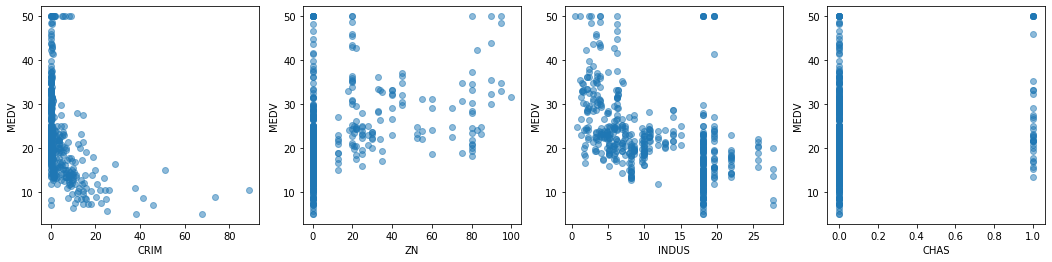

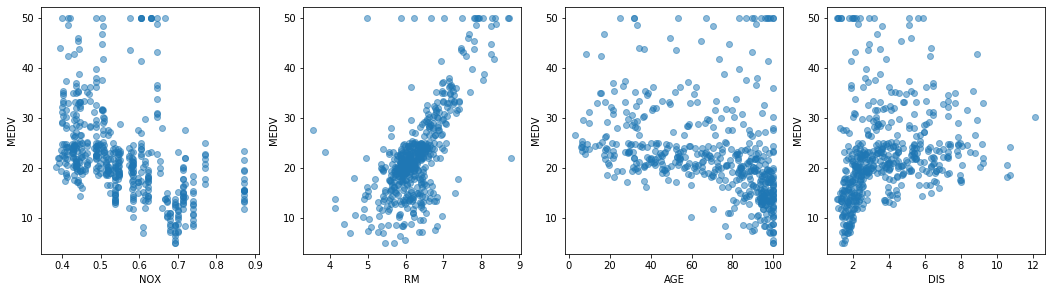

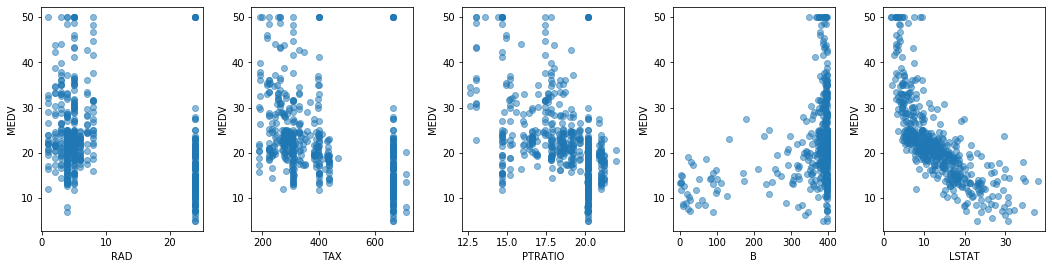

In [10]:
fig1 = plt.figure(figsize=(18,4))

fig1.add_subplot(1,4,1)
plt.scatter(boston['CRIM'], boston['MEDV'], alpha=0.5)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
fig1.add_subplot(1,4,2)
plt.scatter(boston['ZN'], boston['MEDV'], alpha=0.5)
plt.xlabel('ZN')
plt.ylabel('MEDV')
fig1.add_subplot(1,4,3)
plt.scatter(boston['INDUS'], boston['MEDV'], alpha=0.5)
plt.xlabel('INDUS')
plt.ylabel('MEDV')
fig1.add_subplot(1,4,4)
plt.scatter(boston['CHAS'], boston['MEDV'], alpha=0.5)
plt.xlabel('CHAS')
plt.ylabel('MEDV')

fig2 = plt.figure(figsize=(18,10))
fig2.add_subplot(2,4,1)
plt.scatter(boston['NOX'], boston['MEDV'], alpha=0.5)
plt.xlabel('NOX')
plt.ylabel('MEDV')
fig2.add_subplot(2,4,2)
plt.scatter(boston['RM'], boston['MEDV'], alpha=0.5)
plt.xlabel('RM')
plt.ylabel('MEDV')
fig2.add_subplot(2,4,3)
plt.scatter(boston['AGE'], boston['MEDV'], alpha=0.5)
plt.xlabel('AGE')
plt.ylabel('MEDV')
fig2.add_subplot(2,4,4)
plt.scatter(boston['DIS'], boston['MEDV'], alpha=0.5)
plt.xlabel('DIS')
plt.ylabel('MEDV')

plt.subplots_adjust(wspace=0.2)

fig3 = plt.figure(figsize=(18,14))
fig3.add_subplot(3,5,1)
plt.scatter(boston['RAD'], boston['MEDV'], alpha=0.5)
plt.xlabel('RAD')
plt.ylabel('MEDV')
fig3.add_subplot(3,5,2)
plt.scatter(boston['TAX'], boston['MEDV'], alpha=0.5)
plt.xlabel('TAX')
plt.ylabel('MEDV')
fig3.add_subplot(3,5,3)
plt.scatter(boston['PTRATIO'], boston['MEDV'], alpha=0.5)
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
fig3.add_subplot(3,5,4)
plt.scatter(boston['B'], boston['MEDV'], alpha=0.5)
plt.xlabel('B')
plt.ylabel('MEDV')
fig3.add_subplot(3,5,5)
plt.scatter(boston['LSTAT'], boston['MEDV'], alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.subplots_adjust(wspace=0.3)

### 波士頓房價影響因素 ( 篩選後 )
* CRIM 犯罪率
* ~ZN 住宅用地所佔比例~
* INDUS 非商業用地所佔比率
* ~CHAS 查爾斯河的虛擬變量~
* NOX 一氧化碳濃度
* RM 平均房間數
* ~AGE 1940年以前建的房子之自住比例~
* DIS 就業中心之加權距離
* ~RAD 高速公路的可到達指數~
* TAX 不動產稅率
* PTRATIO 學生和教師的比例
* B 城鎮的黑人比例
* LSTAT 低等階層比例

In [11]:
boston.drop(['ZN','CHAS','AGE','RAD'], axis = 1, inplace = True)

In [12]:
boston.head()

,CRIM,INDUS,NOX,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,6.0622,222.0,18.7,396.90,5.33,36.2


## 準備訓練資料

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## 數據分析

#### step1. 開函數學習機

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

#### step2. 訓練

In [18]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### step3. 預測

In [19]:
y_predict = model.predict(x_test)

In [20]:
import seaborn as sns

In [21]:
sns.set()

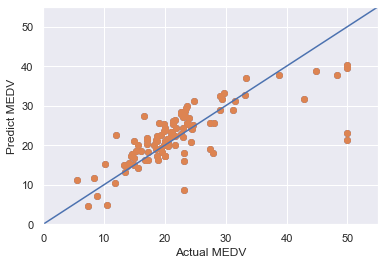

In [23]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.scatter(y_test,y_predict)
plt.plot([0,55], [0,55], "b")